# 1. Setting up the MNIST Dataset

## 1.1 Import Packages and Setup Environment

In [6]:
import snntorch as snn
import torch

# Training Parameters
batch_size = 128
data_path = '/data/mnist'
num_classes = 10 #MNIST has 10 output classes

dtype = torch.float

## 1.2 Download Dataset

In [8]:
from torchvision import datasets, transforms

#Define a transform
transform = transforms.Compose([
            transforms.Resize((28,28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)

# # temporary dataloader if MNIST service is unavailable
# !wget www.di.ens.fr/~lelarge/MNIST.tar.gz
# !tar -zxvf MNIST.tar.gz

# mnist_train = datasets.MNIST(root = './', train=True, download=True, transform=transform)

In [10]:
print(f"The size of mnist_train is {len(mnist_train)}")

The size of mnist_train is 60000


## 1.3 Create Dataloaders

In [12]:
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

# 2. Spike Encoding

## 2.1 Rate Coding of MNIST

In [13]:
# Temporal Dynamics
num_steps = 10

# create vector filled with 0.5
raw_vector = torch.ones(num_steps)*0.5

# pass each sample through a Bernoulli trial
rate_coded_vector = torch.bernoulli(raw_vector)

In [14]:
print(f"Converted vector: {rate_coded_vector}")

Converted vector: tensor([1., 0., 1., 1., 0., 0., 0., 0., 1., 1.])


In [15]:
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 50.00% of the time.


Now try again, but increasing the length of raw_vector:

In [16]:
num_steps = 100

# create vector filled with 0.5
raw_vector = torch.ones(num_steps)*0.5

# pass each sample through a Bernoulli trial
rate_coded_vector = torch.bernoulli(raw_vector)

In [17]:
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

The output is spiking 52.00% of the time.


In [18]:
from snntorch import spikegen

# Iterate through minibatches
data = iter(train_loader)
data_it, targets_it = next(data)

# Spiking Data
spike_data = spikegen.rate(data_it, num_steps=num_steps)

In [19]:
print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


## 2.2 Visualization

### 2.2.1 Animation 

In [20]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

In [22]:
spike_data_sample = spike_data[:, 0, 0]

In [23]:
print(spike_data_sample.size())

torch.Size([100, 28, 28])


In [24]:
torch.Size([100, 28, 28])

torch.Size([100, 28, 28])

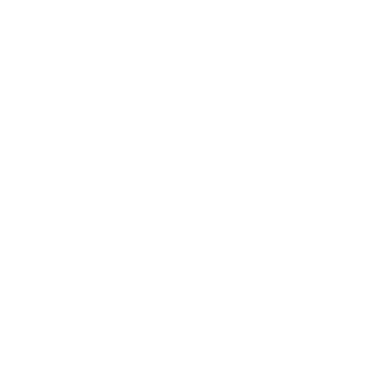

In [27]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax)
plt.rcParams['animation.ffmpeg_path'] = r"C:\Users\jack\Desktop\ffmpeg-master-latest-win64-gpl\bin\ffmpeg.exe"

HTML(anim.to_html5_video())

In [28]:
print(f"The corresponding target is: {targets_it[0]}")

The corresponding target is: 2


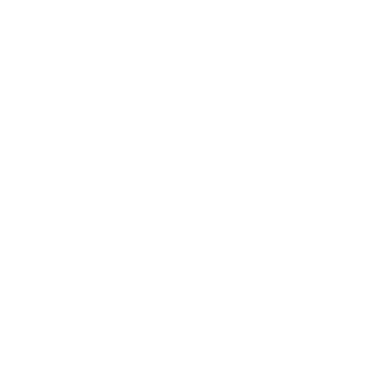

In [29]:
spike_data = spikegen.rate(data_it, num_steps=num_steps, gain=0.25)

spike_data_sample2 = spike_data[:, 0, 0]
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample2, fig, ax)
HTML(anim.to_html5_video())

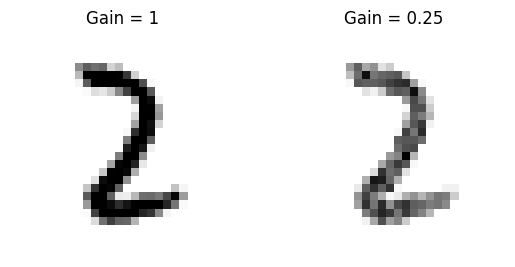

In [30]:
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 1')

plt.subplot(1,2,2)
plt.imshow(spike_data_sample2.mean(axis=0).reshape((28,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 0.25')

plt.show()

### 2.2.2 Raster Plots 

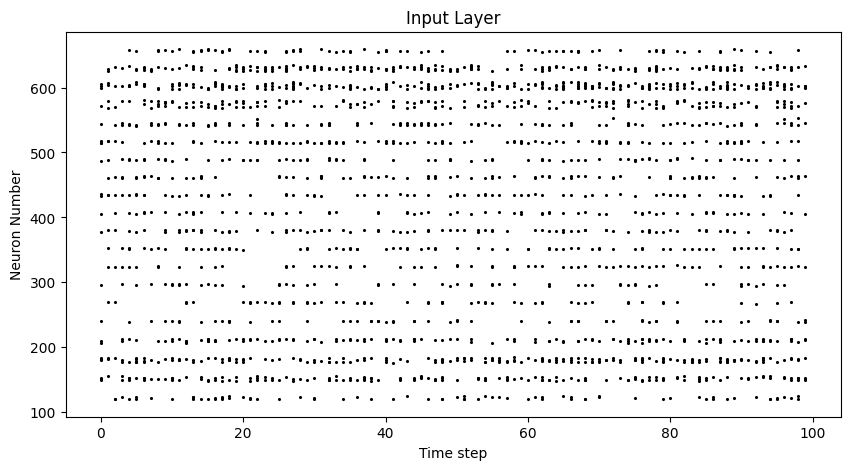

In [31]:
# Reshape
spike_data_sample2 = spike_data_sample2.reshape((num_steps, -1))

# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2, ax, s=1.5, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

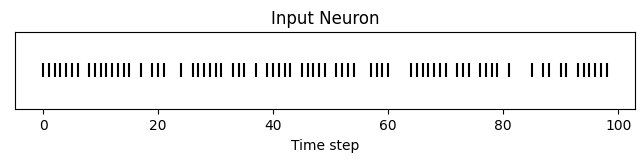

In [32]:
idx = 210  # index into 210th neuron

fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spike_data_sample.reshape(num_steps, -1)[:, idx].unsqueeze(1), ax, s=100, c="black", marker="|")

plt.title("Input Neuron")
plt.xlabel("Time step")
plt.yticks([])
plt.show()